In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torch import nn
from torch.nn import functional as F

In [3]:
# self attention
class self_attention(nn.Module):
    '''
    Module to apply self attention to an input sequence of vectors
    
    parameters:
    
    emb_dim = dimension of the embedding vector
    h = number of self attention heads
    
    '''
    def __init__(self, emb_dim, h):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # Querry vector
        self.WQ = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        self.WK = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        self.WV = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        
    def forward(self, x):
        # x has shape (batch_size, seq_len, emb_dim)
        batch_size = x.shape[0]
        seq_len = x.shape[1]
        querries = self.WQ(x)
        keys = self.WK(x)
        values = self.WV(x)
        att_scores = F.softmax(querries@keys.permute(0,2,1) \
                               /np.sqrt(self.red_vec_size), dim = 2)
        ctx_vecs = att_scores @ values 
        assert ctx_vecs.shape == (batch_size, seq_len, self.red_vec_size ) 
        return querries, keys, values, att_scores, ctx_vecs

In [4]:
batch_size = 5
seq_len = 3
emb_dim = 4
h = 1
x = torch.randn((batch_size, seq_len, emb_dim))
attn = self_attention(emb_dim, h)

In [5]:
attn

self_attention(
  (WQ): Linear(in_features=4, out_features=4, bias=False)
  (WK): Linear(in_features=4, out_features=4, bias=False)
  (WV): Linear(in_features=4, out_features=4, bias=False)
)

In [6]:
q , k, v, s, c = attn(x)

In [7]:
q.shape, k.shape, v.shape, s.shape, c.shape

(torch.Size([5, 3, 4]),
 torch.Size([5, 3, 4]),
 torch.Size([5, 3, 4]),
 torch.Size([5, 3, 3]),
 torch.Size([5, 3, 4]))

In [8]:
q1 = q[0,0]
keys = k[0]
values = v[0]
ctx_vecs = c[0]

In [9]:
q1

tensor([-0.1707, -0.5051, -0.0960, -1.0003], grad_fn=<SelectBackward>)

In [10]:
keys

tensor([[-0.1833,  0.0102, -0.2582, -0.5697],
        [-0.2226,  0.1066, -0.0829,  0.1139],
        [-0.6665,  1.0764,  0.5193,  1.2742]], grad_fn=<SelectBackward>)

In [11]:
keys.shape

torch.Size([3, 4])

In [12]:
q1@keys.T

tensor([ 0.6208, -0.1218, -1.7544], grad_fn=<SqueezeBackward3>)

In [13]:
scrs = F.softmax(q1@keys.T/np.sqrt(4), dim = 0)
scrs

tensor([0.5013, 0.3458, 0.1529], grad_fn=<SoftmaxBackward>)

In [14]:
s[0,0]

tensor([0.5013, 0.3458, 0.1529], grad_fn=<SelectBackward>)

In [15]:
F.softmax(q@k.permute(0,2,1) /np.sqrt(4), dim = 2)

tensor([[[0.5013, 0.3458, 0.1529],
         [0.2956, 0.3199, 0.3845],
         [0.1782, 0.2625, 0.5593]],

        [[0.2920, 0.2894, 0.4186],
         [0.2995, 0.2933, 0.4073],
         [0.3242, 0.3104, 0.3654]],

        [[0.4895, 0.3361, 0.1745],
         [0.3588, 0.3449, 0.2964],
         [0.3035, 0.3204, 0.3761]],

        [[0.3343, 0.3388, 0.3269],
         [0.3319, 0.3284, 0.3398],
         [0.2968, 0.3019, 0.4013]],

        [[0.3792, 0.3482, 0.2726],
         [0.3807, 0.3489, 0.2704],
         [0.2963, 0.3194, 0.3843]]], grad_fn=<SoftmaxBackward>)

In [16]:
scrs.sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [17]:
scrs@v[0]

tensor([-0.2465,  0.7646, -0.5022, -0.4824], grad_fn=<SqueezeBackward3>)

In [18]:
c[0]

tensor([[-0.2465,  0.7646, -0.5022, -0.4824],
        [ 0.1580,  0.6186, -0.2870, -0.5971],
        [ 0.4415,  0.5388, -0.1455, -0.6847]], grad_fn=<SelectBackward>)

In [19]:
attn(x)[4]

tensor([[[-0.2465,  0.7646, -0.5022, -0.4824],
         [ 0.1580,  0.6186, -0.2870, -0.5971],
         [ 0.4415,  0.5388, -0.1455, -0.6847]],

        [[-0.5347,  0.0648, -0.2954,  0.1957],
         [-0.5216,  0.0817, -0.2946,  0.1825],
         [-0.4736,  0.1461, -0.2931,  0.1324]],

        [[-0.5657,  0.4318, -0.1775,  0.0313],
         [-0.4352,  0.2696, -0.0836,  0.0570],
         [-0.3721,  0.1683, -0.0400,  0.0858]],

        [[ 0.2293,  0.2412,  0.1840, -0.1002],
         [ 0.2351,  0.2566,  0.1891, -0.1087],
         [ 0.2405,  0.3423,  0.1869, -0.1555]],

        [[ 0.4255,  0.0221,  0.3283, -0.1739],
         [ 0.4269,  0.0222,  0.3295, -0.1761],
         [ 0.3557,  0.0164,  0.2712, -0.0675]]], grad_fn=<UnsafeViewBackward>)

In [20]:
class multi_head_attn(nn.Module):
    '''
    Module to create multiple attention heads
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    
    '''
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = 'False'):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim // h 
        
        self.heads = nn.ModuleList([self_attention(emb_dim, h) for i in range(h)])
        
        # transform the contatenated context vectors to have same size as emb_sim
        # this is to be able to enable implement a skip-connection between the input and output
        self.Wo = nn.Linear(self.red_vec_size*h, emb_dim, bias = False) 
        
        # layer norm
        # should we apply 
        self.LNorm = nn.LayerNorm(emb_dim)
        
        self.drop = nn.Dropout(p_drop)
        
    def forward(self, x):
        ctx_vecs = torch.cat([head(x)[4] for head in self.heads], dim = 2)
        transformed = self.drop(self.Wo(ctx_vecs))
        
        return self.LNorm(x + transformed)

In [21]:
batch_size = 5
seq_len = 3
emb_dim = 6
h = 2
x = torch.randn((batch_size, seq_len, emb_dim))
multihead = multi_head_attn(emb_dim, h)

In [22]:
ctx = multihead(x)

In [23]:
ctx.shape

torch.Size([5, 3, 6])

In [24]:
ctx

tensor([[[ 0.9259, -1.6872, -0.3940, -0.6162,  1.1956,  0.5760],
         [-0.4495, -0.1315, -0.0601,  1.8545,  0.2882, -1.5016],
         [-0.3958,  0.9557,  1.5756, -1.3655, -0.7634, -0.0067]],

        [[-1.0366,  0.8172,  1.7425, -0.8790,  0.0251, -0.6692],
         [-0.8655, -1.3596,  0.4337, -0.0344,  1.7922,  0.0335],
         [ 1.2980,  0.8864,  0.1400, -1.0339, -1.5419,  0.2514]],

        [[-0.3868, -1.8232,  0.0511,  0.5795,  0.1039,  1.4755],
         [-0.4526, -0.0416,  0.3212,  0.2614, -1.7202,  1.6318],
         [ 0.1027, -1.3862, -1.2575,  0.3761,  1.0516,  1.1132]],

        [[ 0.6206,  0.2592,  1.6546, -1.3964, -0.8949, -0.2430],
         [-0.5476,  1.1051, -0.9346, -0.6031,  1.6651, -0.6849],
         [ 1.1760, -0.7325, -1.2813, -0.4193, -0.2296,  1.4866]],

        [[-1.7762,  0.0581, -0.1710,  1.3911, -0.3646,  0.8627],
         [ 0.8566, -0.4226, -0.9785, -1.3076,  1.5198,  0.3323],
         [-1.8776, -0.3418, -0.3376,  0.6804,  1.0382,  0.8384]]],
       grad_fn=

In [25]:
multihead

multi_head_attn(
  (heads): ModuleList(
    (0): self_attention(
      (WQ): Linear(in_features=6, out_features=3, bias=False)
      (WK): Linear(in_features=6, out_features=3, bias=False)
      (WV): Linear(in_features=6, out_features=3, bias=False)
    )
    (1): self_attention(
      (WQ): Linear(in_features=6, out_features=3, bias=False)
      (WK): Linear(in_features=6, out_features=3, bias=False)
      (WV): Linear(in_features=6, out_features=3, bias=False)
    )
  )
  (Wo): Linear(in_features=6, out_features=6, bias=False)
  (LNorm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
  (drop): Dropout(p=0.1, inplace=False)
)

In [26]:
list(multihead.LNorm.parameters())

[Parameter containing:
 tensor([1., 1., 1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0.], requires_grad=True)]

In [27]:
ctx.mean(dim = 2)

tensor([[ 9.9341e-09,  0.0000e+00, -2.9958e-08],
        [-9.9341e-09, -1.6143e-08,  1.9868e-08],
        [ 1.9868e-08,  1.9868e-08,  0.0000e+00],
        [-1.1921e-07,  0.0000e+00,  0.0000e+00],
        [-9.9341e-09,  6.4572e-08, -2.9802e-08]], grad_fn=<MeanBackward1>)

In [28]:
ctx.std(dim = 2)

tensor([[1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954]], grad_fn=<StdBackward1>)

In [29]:
class encoder(nn.Module):
    '''
    The complete encoder module.
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    ffn_l1_out_fts = number of out_features of 1st layer in feed forward NN. Default is 2048 a suggested in the original paper
    
    
    '''
    
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = False, ffn_l1_out_fts = 2048 ):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # multi_head_attention sub-layer
        self.mul_h_attn = multi_head_attn(emb_dim, h, p_drop, parallelize)
        
        # feedforward sublayers
        self.l1 = nn.Linear(emb_dim, ffn_l1_out_fts)
        self.l2 = nn.Linear(ffn_l1_out_fts, emb_dim)
        
        # layer norm
        self.LNorm = nn.LayerNorm(emb_dim) 
        
        self.drop = nn.Dropout(p_drop)
        
    def forward(self, x):
        ctx_vecs = self.mul_h_attn(x)
        out = torch.relu(self.l1(ctx_vecs))
        out = self.drop(self.l2(out))
        
        return self.LNorm(out + ctx_vecs)
            

In [30]:
batch_size = 5
seq_len = 3
emb_dim = 6
h = 2
x = torch.randn((batch_size, seq_len, emb_dim))
enc = encoder(emb_dim, h)

In [31]:
enc

encoder(
  (mul_h_attn): multi_head_attn(
    (heads): ModuleList(
      (0): self_attention(
        (WQ): Linear(in_features=6, out_features=3, bias=False)
        (WK): Linear(in_features=6, out_features=3, bias=False)
        (WV): Linear(in_features=6, out_features=3, bias=False)
      )
      (1): self_attention(
        (WQ): Linear(in_features=6, out_features=3, bias=False)
        (WK): Linear(in_features=6, out_features=3, bias=False)
        (WV): Linear(in_features=6, out_features=3, bias=False)
      )
    )
    (Wo): Linear(in_features=6, out_features=6, bias=False)
    (LNorm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
    (drop): Dropout(p=0.1, inplace=False)
  )
  (l1): Linear(in_features=6, out_features=2048, bias=True)
  (l2): Linear(in_features=2048, out_features=6, bias=True)
  (LNorm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
  (drop): Dropout(p=0.1, inplace=False)
)

In [32]:
enc_out = enc(x)
enc_out

tensor([[[-0.0356, -1.7897,  0.4119, -0.1859, -0.0103,  1.6097],
         [-0.7671,  1.1825, -0.5971,  1.5617, -0.3256, -1.0544],
         [-0.1737,  0.4675, -0.8980, -1.1823,  1.8810, -0.0945]],

        [[-0.4613,  0.6158, -0.9576, -0.8353, -0.2879,  1.9262],
         [ 0.1543,  1.2555, -0.9611, -1.4111,  1.1960, -0.2336],
         [ 0.7304, -1.9692, -0.1333, -0.1860,  0.3776,  1.1806]],

        [[-0.1852, -1.9472, -0.0061,  1.3705,  0.4037,  0.3642],
         [ 1.4038, -1.3256, -1.0521, -0.2566,  1.0290,  0.2016],
         [-0.7487, -1.1383,  0.4902,  1.0123,  1.3765, -0.9919]],

        [[-0.4629, -0.7583,  0.1781,  0.8369,  1.5960, -1.3897],
         [-0.2909,  1.1685,  1.0087,  0.4790, -0.6797, -1.6856],
         [-0.3784,  1.6234, -0.1695,  0.2433,  0.4044, -1.7233]],

        [[ 0.6560, -1.5413,  1.5059, -0.7203,  0.4984, -0.3988],
         [-0.3705, -0.5636, -1.5141,  1.0945, -0.0776,  1.4313],
         [ 0.8952, -0.5541, -0.8983,  1.7043, -0.0628, -1.0844]]],
       grad_fn=

In [33]:
enc_out.shape

torch.Size([5, 3, 6])

In [34]:
x.shape

torch.Size([5, 3, 6])

In [35]:
class encoder_decoder_attention(nn.Module):
    '''
    Module to implement the encoder_decoder attention layer. 
    This is same as the self_attention layer except that it takes two input vectors: 
                 1)encoder's final output 
                 2) output from previous decoder layer
    The querries are generated from the previous decoder layer's output
    The keys and the values are generated from the encoder's output 
         
    '''
    def __init__(self, emb_dim, h):
        super().__init__()
        
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # Querry vector
        self.WQ = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        # Key vector
        self.WK = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        # Value vector
        self.WV = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        
    def forward(self, enc_out, dec_out):
        # x has shape (batch_size, seq_len, emb_dim)
        batch_size = enc_out.shape[0]
        seq_len = dec_out.shape[1] 
        querries = self.WQ(dec_out)
        keys = self.WK(enc_out)
        values = self.WV(enc_out)
        att_scores = F.softmax((querries@keys.permute(0,2,1))\
                               /np.sqrt(self.red_vec_size), dim = 2)
        ctx_vecs = att_scores @ values 
        assert ctx_vecs.shape == (batch_size, seq_len, self.red_vec_size ) 
        return querries, keys, values, att_scores, ctx_vecs

In [36]:
batch_size = 5
seq_len = 4
emb_dim = 6
h = 2
enc_out = torch.randn((batch_size, seq_len, emb_dim))
dec_out = torch.randn(batch_size, seq_len, emb_dim)
enc_dec_attn = encoder_decoder_attention(emb_dim, h)
enc_dec_attn

encoder_decoder_attention(
  (WQ): Linear(in_features=6, out_features=3, bias=False)
  (WK): Linear(in_features=6, out_features=3, bias=False)
  (WV): Linear(in_features=6, out_features=3, bias=False)
)

In [37]:
q, k, v, s, c = enc_dec_attn(enc_out, dec_out)

In [38]:
q.shape, k.shape, v.shape, s.shape, c.shape

(torch.Size([5, 4, 3]),
 torch.Size([5, 4, 3]),
 torch.Size([5, 4, 3]),
 torch.Size([5, 4, 4]),
 torch.Size([5, 4, 3]))

In [39]:
q1 = q[0,0]
q1

tensor([0.5851, 0.3228, 0.0287], grad_fn=<SelectBackward>)

In [40]:
keys = k[0]
keys.shape

torch.Size([4, 3])

In [41]:
q1@keys.T

tensor([-0.2386,  0.4622, -0.2803,  0.3015], grad_fn=<SqueezeBackward3>)

In [42]:
q @ k.permute(0,2,1)

tensor([[[-0.2386,  0.4622, -0.2803,  0.3015],
         [-0.1076,  0.5195, -0.4099,  0.0666],
         [-0.0920,  0.2338, -0.1573,  0.1117],
         [-0.0360, -0.1129,  0.1227,  0.0777]],

        [[ 0.1965, -0.7966,  0.9295,  0.5020],
         [ 0.0727, -0.4285, -0.2303,  0.2997],
         [ 0.0424, -0.6974, -0.1429,  0.4903],
         [ 0.2310,  0.9476,  0.6705, -0.7224]],

        [[ 0.0845, -0.1833, -0.1021, -0.5735],
         [ 0.6533,  0.5061,  0.1724,  0.1860],
         [-0.4343, -1.2003, -0.6771, -1.7024],
         [-0.2764,  0.3819,  0.3625,  0.8314]],

        [[ 0.3854,  0.4597,  0.0902,  0.3203],
         [-0.3616, -0.5499, -0.4439, -0.3563],
         [-0.8763, -1.1128, -0.0414, -1.0954],
         [ 0.5250,  0.7198, -0.1168,  0.9565]],

        [[-0.0465,  0.0854,  0.4184,  0.5191],
         [-0.0551,  0.1738, -0.0035,  0.0927],
         [ 0.1029,  0.1281, -0.2238, -0.3167],
         [-0.0845,  0.0778, -0.0731,  0.0251]]], grad_fn=<UnsafeViewBackward>)

In [43]:
(q @ k.permute(0,2,1)).permute(0,2,1)

tensor([[[-0.2386, -0.1076, -0.0920, -0.0360],
         [ 0.4622,  0.5195,  0.2338, -0.1129],
         [-0.2803, -0.4099, -0.1573,  0.1227],
         [ 0.3015,  0.0666,  0.1117,  0.0777]],

        [[ 0.1965,  0.0727,  0.0424,  0.2310],
         [-0.7966, -0.4285, -0.6974,  0.9476],
         [ 0.9295, -0.2303, -0.1429,  0.6705],
         [ 0.5020,  0.2997,  0.4903, -0.7224]],

        [[ 0.0845,  0.6533, -0.4343, -0.2764],
         [-0.1833,  0.5061, -1.2003,  0.3819],
         [-0.1021,  0.1724, -0.6771,  0.3625],
         [-0.5735,  0.1860, -1.7024,  0.8314]],

        [[ 0.3854, -0.3616, -0.8763,  0.5250],
         [ 0.4597, -0.5499, -1.1128,  0.7198],
         [ 0.0902, -0.4439, -0.0414, -0.1168],
         [ 0.3203, -0.3563, -1.0954,  0.9565]],

        [[-0.0465, -0.0551,  0.1029, -0.0845],
         [ 0.0854,  0.1738,  0.1281,  0.0778],
         [ 0.4184, -0.0035, -0.2238, -0.0731],
         [ 0.5191,  0.0927, -0.3167,  0.0251]]], grad_fn=<PermuteBackward>)

In [44]:
scores1 = F.softmax((q1@keys.T/np.sqrt(3)), dim = 0)
scores1

tensor([0.2066, 0.3096, 0.2017, 0.2822], grad_fn=<SoftmaxBackward>)

In [45]:
s[0]

tensor([[0.2066, 0.3096, 0.2017, 0.2822],
        [0.2282, 0.3278, 0.1917, 0.2524],
        [0.2328, 0.2810, 0.2242, 0.2619],
        [0.2427, 0.2322, 0.2660, 0.2592]], grad_fn=<SelectBackward>)

In [46]:
scores1.sum()

tensor(1., grad_fn=<SumBackward0>)

In [47]:
v[0]

tensor([[ 0.6055, -0.5224,  0.3504],
        [-0.4461,  0.1327,  1.0524],
        [ 0.5984, -0.3364, -0.2927],
        [ 0.0488,  0.3979, -0.1701]], grad_fn=<SelectBackward>)

In [48]:
scores1 @ v[0]

tensor([ 0.1214, -0.0224,  0.2912], grad_fn=<SqueezeBackward3>)

In [49]:
c[0]

tensor([[ 0.1214, -0.0224,  0.2912],
        [ 0.1190, -0.0398,  0.3259],
        [ 0.1626, -0.0556,  0.2672],
        [ 0.2152, -0.0823,  0.2075]], grad_fn=<SelectBackward>)

In [50]:
q2 = q[0,1]
q2

tensor([-0.1333,  0.0262, -0.5583], grad_fn=<SelectBackward>)

In [51]:
scores2 = F.softmax((q2@keys.T/np.sqrt(3)), dim = 0)
scores2

tensor([0.2282, 0.3278, 0.1917, 0.2524], grad_fn=<SoftmaxBackward>)

In [52]:
scores2@v[0]

tensor([ 0.1190, -0.0398,  0.3259], grad_fn=<SqueezeBackward3>)

In [53]:
qq1 = q[1,0]
keys = k[1]
scores = F.softmax((qq1@keys.T/np.sqrt(3)), dim = 0)
scores@v[1]

tensor([-0.1126, -0.1594,  0.1096], grad_fn=<SqueezeBackward3>)

In [54]:
c[1]

tensor([[-1.1258e-01, -1.5942e-01,  1.0960e-01],
        [ 1.8386e-03, -8.1636e-02,  1.3021e-01],
        [ 6.1147e-05, -9.0170e-02,  1.7935e-01],
        [-7.9225e-02, -1.1541e-01, -1.7236e-01]], grad_fn=<SelectBackward>)

In [55]:
class multi_head_enc_dec_attn(nn.Module):
    def __init__(self, emb_dim, h, p_drop = 0.1):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim // h 
        
        self.heads = nn.ModuleList([encoder_decoder_attention(emb_dim, h) for i in range(h)])
        
        # transform the contatenated context vectors to have same size as emb_sim
        # this is to be able to enable implement a skip-connection between the input and output
        self.Wo = nn.Linear(self.red_vec_size*h, emb_dim, bias = False) 
        
        # layer norm
        # should we apply 
        self.LNorm = nn.LayerNorm(emb_dim)
        self.drop = nn.Dropout(p_drop)
        
    def forward(self, enc_out, dec_out):
        ctx_vecs = torch.cat([head(enc_out, dec_out)[4] for head in self.heads], dim = 2)
        transformed = self.drop(self.Wo(ctx_vecs))
        
        return self.LNorm(dec_out + transformed)

In [56]:
batch_size = 5
seq_len = 4
emb_dim = 7
h = 2
enc_out = torch.randn((batch_size, seq_len, emb_dim))
dec_out = torch.randn(batch_size, seq_len, emb_dim)
enc_dec_attn = multi_head_enc_dec_attn(emb_dim, h)
enc_dec_attn

multi_head_enc_dec_attn(
  (heads): ModuleList(
    (0): encoder_decoder_attention(
      (WQ): Linear(in_features=7, out_features=3, bias=False)
      (WK): Linear(in_features=7, out_features=3, bias=False)
      (WV): Linear(in_features=7, out_features=3, bias=False)
    )
    (1): encoder_decoder_attention(
      (WQ): Linear(in_features=7, out_features=3, bias=False)
      (WK): Linear(in_features=7, out_features=3, bias=False)
      (WV): Linear(in_features=7, out_features=3, bias=False)
    )
  )
  (Wo): Linear(in_features=6, out_features=7, bias=False)
  (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
  (drop): Dropout(p=0.1, inplace=False)
)

In [57]:
ctx = enc_dec_attn(enc_out, dec_out)

In [58]:
ctx.shape

torch.Size([5, 4, 7])

In [59]:
batch_size = 5
enc_seq_len = 4
dec_seq_len = 2
emb_dim = 7
h = 2
enc_out = torch.randn((batch_size, enc_seq_len, emb_dim))
dec_out = torch.randn(batch_size, dec_seq_len, emb_dim)
enc_dec_attn = multi_head_enc_dec_attn(emb_dim, h)
enc_dec_attn

multi_head_enc_dec_attn(
  (heads): ModuleList(
    (0): encoder_decoder_attention(
      (WQ): Linear(in_features=7, out_features=3, bias=False)
      (WK): Linear(in_features=7, out_features=3, bias=False)
      (WV): Linear(in_features=7, out_features=3, bias=False)
    )
    (1): encoder_decoder_attention(
      (WQ): Linear(in_features=7, out_features=3, bias=False)
      (WK): Linear(in_features=7, out_features=3, bias=False)
      (WV): Linear(in_features=7, out_features=3, bias=False)
    )
  )
  (Wo): Linear(in_features=6, out_features=7, bias=False)
  (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
  (drop): Dropout(p=0.1, inplace=False)
)

In [60]:
enc_dec_attn(enc_out, dec_out)

tensor([[[-0.3173, -1.6642,  1.7774, -0.3332,  0.4479, -0.5276,  0.6169],
         [ 0.1208, -1.3695, -0.9401,  0.0946,  0.5969,  1.9191, -0.4219]],

        [[-0.9383,  0.1214,  0.8312,  0.3525,  1.1789,  0.3903, -1.9359],
         [-0.5820,  0.9302,  1.2656, -0.7181,  0.8239, -1.7319,  0.0124]],

        [[-0.8074,  1.4518, -0.2936,  0.2333,  1.2601, -0.2854, -1.5589],
         [ 1.0341,  0.6134, -0.3227, -0.3150, -2.1528,  0.7492,  0.3939]],

        [[ 0.5503,  0.9743,  0.7737, -0.5613, -1.6007, -1.1318,  0.9955],
         [ 0.8599,  0.2042,  1.9179, -0.6513, -1.1056, -0.8804, -0.3447]],

        [[ 1.5442, -0.9471, -0.1551,  1.4458, -0.6907, -1.0515, -0.1455],
         [ 0.2330, -0.4681,  1.0447,  1.1513,  0.5465, -1.9123, -0.5951]]],
       grad_fn=<NativeLayerNormBackward>)

In [61]:
slfattn = multi_head_attn(emb_dim, h)
slfattn(dec_out)

tensor([[[-0.4988, -1.7826,  1.5387,  0.0354,  0.7932, -0.5776,  0.4918],
         [-0.0953, -1.0355, -1.2734,  0.5354,  0.7089,  1.7706, -0.6107]],

        [[-0.9999,  0.4062,  0.5202,  0.2215,  1.3127,  0.4370, -1.8977],
         [-0.6400,  1.0514,  0.9517, -0.5565,  1.1456, -1.7012, -0.2510]],

        [[-0.5464,  1.5039, -0.5959,  0.0448,  1.3711, -0.3305, -1.4469],
         [ 1.1695,  0.6443, -0.4210, -0.4066, -2.0705,  0.5433,  0.5409]],

        [[ 0.2423,  0.5006,  1.3882, -0.3299, -1.5980, -1.1215,  0.9183],
         [ 0.2305, -0.4451,  2.2930, -0.2870, -1.0564, -0.4733, -0.2617]],

        [[ 0.9524, -1.4725,  0.0829,  1.7462, -0.2753, -0.8763, -0.1575],
         [ 0.1144, -1.0332,  0.8611,  1.5092,  0.5765, -1.5197, -0.5082]]],
       grad_fn=<NativeLayerNormBackward>)

In [62]:
dec_out2 = torch.randn(batch_size, dec_seq_len+1, emb_dim)

In [63]:
slfattn(dec_out2)

tensor([[[ 0.1029,  0.7477, -1.0303, -1.5965,  1.6525,  0.2635, -0.1398],
         [ 1.1281,  1.3965,  0.2882, -1.3040,  0.1451, -1.3769, -0.2771],
         [-0.7297, -0.4891,  1.0553,  1.0451, -1.7745,  0.9337, -0.0409]],

        [[ 0.2068,  1.2343, -2.1818,  0.7834, -0.0167, -0.1848,  0.1589],
         [-0.0838,  0.7375, -1.8564,  0.3816, -1.0447,  1.0443,  0.8216],
         [-1.4907, -0.0035,  0.7861, -0.5105, -0.9738,  1.6195,  0.5728]],

        [[-0.4152, -0.2604,  0.0931,  1.1401,  1.0777,  0.3974, -2.0327],
         [ 0.7210, -0.9723, -1.6990, -0.0964,  1.4246,  0.7668, -0.1447],
         [-1.1520,  0.3464, -0.8244,  0.5261,  1.0745,  1.3265, -1.2970]],

        [[-0.8125,  0.3123,  0.1416,  0.4287, -0.5370, -1.4460,  1.9129],
         [-1.0633,  0.5191, -0.8180,  1.2000,  1.5740, -0.6145, -0.7973],
         [-0.9160,  0.2177,  0.5910, -1.4987, -0.2385, -0.0157,  1.8602]],

        [[-0.1307, -0.7871,  0.5103, -0.6371,  1.5145,  1.0482, -1.5181],
         [ 1.3339,  0.5637,  1

In [64]:
class decoder(nn.Module):
    '''
    The complete decoder module. 
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    ffn_l1_out_fts = number of out_features of 1st layer in feed forward NN. Default is 2048 a suggested in the original paper
    
    '''
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = False, ffn_l1_out_fts = 2048):
        super().__init__()
        
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # multi_head_attention sub-layer
        self.mul_h_attn = multi_head_attn(emb_dim, h, p_drop, parallelize)
        
        # multi head encoder decoder attention sublayer
        self.mul_h_enc_dec_attn = multi_head_enc_dec_attn(emb_dim, h, p_drop)
        
        # feedforward sublayers
        self.l1 = nn.Linear(emb_dim, ffn_l1_out_fts)
        self.l2 = nn.Linear(ffn_l1_out_fts, emb_dim)
        
        # layer norm
        self.LNorm = nn.LayerNorm(emb_dim) 
        
        self.drop = nn.Dropout(p_drop)
        
    def forward(self, enc_vecs, dec_vecs):
        dec_vecs = self.mul_h_attn(dec_vecs)
        ff_in = self.mul_h_enc_dec_attn(enc_vecs, dec_vecs)
        out = torch.relu(self.l1(ff_in))
        out = self.drop(self.l2(out))
        
        return self.LNorm(out + ff_in)
    
    
    

In [65]:
batch_size = 5
enc_seq_len = 4
dec_seq_len = 2
emb_dim = 7
h = 2
enc_out = torch.randn((batch_size, enc_seq_len, emb_dim))
dec_out = torch.randn(batch_size, dec_seq_len, emb_dim)
dec = decoder(emb_dim, h)
dec

decoder(
  (mul_h_attn): multi_head_attn(
    (heads): ModuleList(
      (0): self_attention(
        (WQ): Linear(in_features=7, out_features=3, bias=False)
        (WK): Linear(in_features=7, out_features=3, bias=False)
        (WV): Linear(in_features=7, out_features=3, bias=False)
      )
      (1): self_attention(
        (WQ): Linear(in_features=7, out_features=3, bias=False)
        (WK): Linear(in_features=7, out_features=3, bias=False)
        (WV): Linear(in_features=7, out_features=3, bias=False)
      )
    )
    (Wo): Linear(in_features=6, out_features=7, bias=False)
    (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
    (drop): Dropout(p=0.1, inplace=False)
  )
  (mul_h_enc_dec_attn): multi_head_enc_dec_attn(
    (heads): ModuleList(
      (0): encoder_decoder_attention(
        (WQ): Linear(in_features=7, out_features=3, bias=False)
        (WK): Linear(in_features=7, out_features=3, bias=False)
        (WV): Linear(in_features=7, out_features=3, bias=False

In [66]:
dec_ot = dec(enc_out, dec_out)
dec_ot.shape

torch.Size([5, 2, 7])

In [67]:
dec_out.shape

torch.Size([5, 2, 7])

In [68]:
def positional_encoding(emb_dim, seq_len):
    posts = torch.arange(seq_len).unsqueeze(1)
    pows = 10000**(torch.arange(emb_dim//2)/float(emb_dim))
    mat = posts/pows # rows = position in the sequence , # col = index along the embedding space
    first_half = torch.sin(mat)
    second_half = torch.cos(mat)
    out = torch.cat((first_half, second_half), dim = 1)
    return out
    

In [69]:
mm = positional_encoding(512,20)

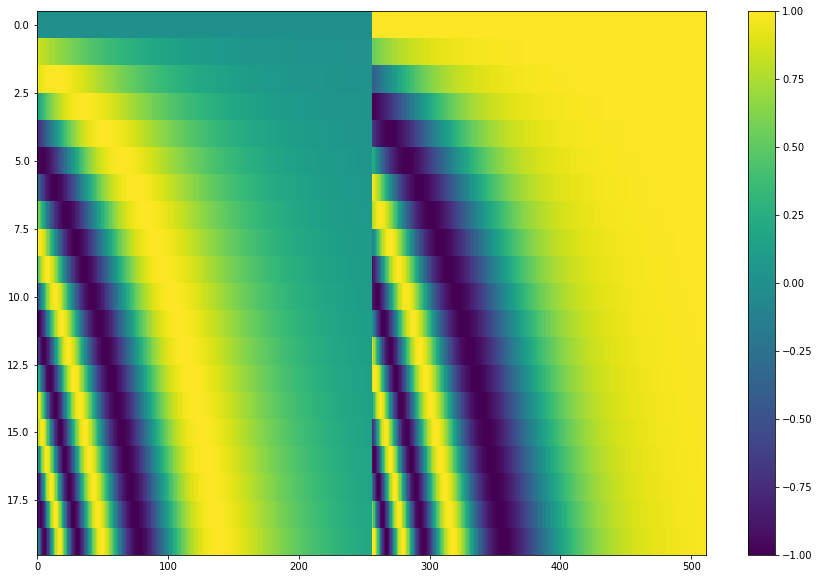

In [70]:
plt.figure(figsize = (15,10))
plt.imshow(mm.numpy(), aspect = 'auto')
plt.colorbar()
plt.show()

In [71]:
bs = 5
seq_len = 3
emb_dim = 4
arr1 = torch.randint(low =0, high = 5, size = (bs, seq_len, emb_dim))
arr1

tensor([[[4, 2, 3, 1],
         [4, 1, 2, 4],
         [3, 4, 4, 1]],

        [[1, 0, 3, 4],
         [0, 1, 4, 1],
         [0, 0, 2, 3]],

        [[1, 4, 0, 4],
         [1, 2, 3, 0],
         [2, 3, 0, 1]],

        [[4, 0, 1, 2],
         [1, 3, 3, 0],
         [2, 4, 1, 0]],

        [[3, 0, 2, 1],
         [4, 0, 0, 3],
         [3, 3, 3, 1]]])

In [72]:
arr2 = positional_encoding(emb_dim, seq_len)
arr2

tensor([[ 0.0000,  0.0000,  1.0000,  1.0000],
        [ 0.8415,  0.0998,  0.5403,  0.9950],
        [ 0.9093,  0.1987, -0.4161,  0.9801]])

In [73]:
arr1+arr2

tensor([[[ 4.0000,  2.0000,  4.0000,  2.0000],
         [ 4.8415,  1.0998,  2.5403,  4.9950],
         [ 3.9093,  4.1987,  3.5839,  1.9801]],

        [[ 1.0000,  0.0000,  4.0000,  5.0000],
         [ 0.8415,  1.0998,  4.5403,  1.9950],
         [ 0.9093,  0.1987,  1.5839,  3.9801]],

        [[ 1.0000,  4.0000,  1.0000,  5.0000],
         [ 1.8415,  2.0998,  3.5403,  0.9950],
         [ 2.9093,  3.1987, -0.4161,  1.9801]],

        [[ 4.0000,  0.0000,  2.0000,  3.0000],
         [ 1.8415,  3.0998,  3.5403,  0.9950],
         [ 2.9093,  4.1987,  0.5839,  0.9801]],

        [[ 3.0000,  0.0000,  3.0000,  2.0000],
         [ 4.8415,  0.0998,  0.5403,  3.9950],
         [ 3.9093,  3.1987,  2.5839,  1.9801]]])

In [74]:
class encoder_stack(nn.Module):
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = False, 
                 ffn_l1_out_fts = 2048,n_encoders = 3):
        super().__init__()
        
        self.stack = nn.Sequential(*[encoder(emb_dim, h, p_drop , 
                                               parallelize, 
                                               ffn_l1_out_fts)  for _ in range(n_encoders)])
        
    def forward(self, x):
        out = self.stack(x)
        
        return out        

In [75]:
batch_size = 5
seq_len = 3
emb_dim = 6
h = 2
x = torch.randn((batch_size, seq_len, emb_dim))
enc = encoder_stack(emb_dim, h)

In [76]:
out = enc(x)
out.shape

torch.Size([5, 3, 6])

In [77]:
out

tensor([[[-1.8923,  0.5251, -0.6445,  0.1678,  0.9223,  0.9216],
         [ 1.5862,  0.4855,  0.2114, -0.2154, -1.7478, -0.3198],
         [ 0.3710, -1.5323, -0.1097,  1.7951,  0.0050, -0.5290]],

        [[ 0.5004,  0.4904, -0.7157, -0.9441, -1.0586,  1.7276],
         [-1.4770, -0.2304,  0.3106,  0.7953,  1.4957, -0.8941],
         [ 0.4796,  0.4736,  1.3118, -0.1610, -0.1617, -1.9424]],

        [[-0.8948,  0.2216, -0.5275, -0.1729, -0.7094,  2.0830],
         [-1.8062, -0.0883,  0.5582, -0.4624,  0.3578,  1.4410],
         [ 0.8628,  0.2824, -0.0896, -1.4836, -0.9849,  1.4129]],

        [[ 1.1757, -0.6365,  1.2020,  0.1115, -1.6471, -0.2056],
         [-0.9778, -0.0948, -1.3293,  0.2655,  0.3919,  1.7446],
         [-1.9514,  0.6208,  0.1675, -0.2584,  0.1184,  1.3030]],

        [[-0.6611,  0.1051, -1.1419,  0.9845, -0.8730,  1.5864],
         [-1.1484,  0.0979, -0.2839,  0.7939, -1.1108,  1.6513],
         [-1.6814, -0.4246,  0.1021,  0.0486,  1.7085,  0.2469]]],
       grad_fn=

In [78]:
class decoder_stack(nn.Module):
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = False, 
                 ffn_l1_out_fts = 2048, n_decoders = 3 ):
        super().__init__()
        
        self.stack = nn.ModuleList([decoder(emb_dim, h, p_drop = 0.1, parallelize = False,
                                             ffn_l1_out_fts = 2048) 
                                     for _ in range(n_decoders)])
        
    def forward(self, enc_vecs, dec_vecs):
        for decoder in self.stack:
            dec_vecs = decoder(enc_vecs, dec_vecs)
        
        # the decoder stack returns only the feature vector corresponding to 
        # the last step in decoder's input seq
        # this is then expected to be passed to through a fully-connected network which will 
        # output the logits corresponding to the next possible word
        return dec_vecs[:, -1]

In [79]:
batch_size = 5
enc_seq_len = 4
dec_seq_len = 2
emb_dim = 7
h = 2
x = torch.randn((batch_size, enc_seq_len, emb_dim))
dec_vecs = torch.randn(batch_size, dec_seq_len, emb_dim)
enc = encoder_stack(emb_dim, h)
dec = decoder_stack(emb_dim, h)

In [80]:
enc_vecs = enc(x)
enc_vecs.shape

torch.Size([5, 4, 7])

In [81]:
dec_out = dec(enc_vecs, dec_vecs)
dec_out.shape

torch.Size([5, 7])

In [82]:
dec_out

tensor([[ 0.2405, -1.1956,  0.9338, -1.3085,  1.2596,  0.8535, -0.7833],
        [ 0.8869, -0.6120,  0.1558,  0.0080,  0.2228, -1.9960,  1.3345],
        [ 1.2522, -0.7844,  0.8889, -0.8395, -1.2560,  1.2270, -0.4883],
        [-0.3582,  1.5590, -0.5934, -1.4005, -0.4902, -0.0877,  1.3710],
        [ 0.8713, -1.0543,  0.7087, -0.6222, -0.5930, -1.0062,  1.6958]],
       grad_fn=<SelectBackward>)

## Importing pretrained embeddings for english-french translation

In [83]:
import glob

In [84]:
path = '/home/prarit/.fastai/data/giga-fren/giga-fren'

In [85]:
p = glob.glob(path + '/*',)
p

['/home/prarit/.fastai/data/giga-fren/giga-fren/giga-fren.release2.fixed.en',
 '/home/prarit/.fastai/data/giga-fren/giga-fren/cc.fr.300.bin',
 '/home/prarit/.fastai/data/giga-fren/giga-fren/models',
 '/home/prarit/.fastai/data/giga-fren/giga-fren/questions_easy.csv',
 '/home/prarit/.fastai/data/giga-fren/giga-fren/cc.en.300.bin',
 '/home/prarit/.fastai/data/giga-fren/giga-fren/giga-fren.release2.fixed.fr',
 '/home/prarit/.fastai/data/giga-fren/giga-fren/data_save.pkl']

In [86]:
p[3]

'/home/prarit/.fastai/data/giga-fren/giga-fren/questions_easy.csv'

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv(p[3])
df.head()

,en,fr
0,What is light ?,Qu’est-ce que la lumière?
1,Who are we?,Où sommes-nous?
2,Where did we come from?,D'où venons-nous?
3,What would we do without it?,Que ferions-nous sans elle ?
4,What is the absolute location (latitude and lo...,Quelle sont les coordonnées (latitude et longi...


In [89]:
import fasttext as ft

### French word embeddings from fasttext

In [90]:
p[1]

'/home/prarit/.fastai/data/giga-fren/giga-fren/cc.fr.300.bin'

In [91]:
fr_vecs = ft.load_model(p[1])

In [92]:
fr_vecs.get_words()[:10]

[',', 'de', '.', '</s>', 'la', 'et', ':', 'à', 'le', '"']

In [93]:
fr_vecs.get_words()[-5:]

['Christine2016-09-25T00', 'OsakaVol', 'vanxains', 'Fautereau', 'IdealCoque']

In [94]:
fr_em = np.vstack([fr_vecs.get_word_vector(word) for word in fr_vecs.get_words()])
fr_em.shape

(2000000, 300)

In [95]:
fr_em

array([[ 0.00577707,  0.04779333,  0.10935942, ..., -0.39309484,
         0.02299723,  0.03783275],
       [-0.08417767, -0.0387751 ,  0.04563154, ...,  0.30691683,
        -0.01057968,  0.05789498],
       [-0.04397016,  0.04554555,  0.02698731, ..., -0.5981208 ,
         0.0707877 ,  0.06577325],
       ...,
       [ 0.006853  ,  0.02617954, -0.02090381, ..., -0.00476689,
        -0.01509672, -0.02793315],
       [-0.00469146,  0.01363324, -0.02618388, ..., -0.05144572,
         0.02708546,  0.0168991 ],
       [-0.01181357, -0.01020516,  0.00633048, ..., -0.00472526,
         0.02741901,  0.01010639]], dtype=float32)

In [96]:
np.allclose(fr_vecs.get_word_vector(','), fr_em[0])

True

### English word embeddings from fasttext

In [97]:
p[4]

'/home/prarit/.fastai/data/giga-fren/giga-fren/cc.en.300.bin'

In [98]:
en_vecs = ft.load_model(p[4])

In [99]:
en_vecs.get_words()[:10]

[',', 'the', '.', 'and', 'to', 'of', 'a', '</s>', 'in', 'is']

In [100]:
en_vecs.get_words()[-5:]

['ldapmodify', 'sponde', 'hvm', 'GorceyBearTerritory.netSaturday', 'Zwicke']

In [101]:
en_em = np.vstack([en_vecs.get_word_vector(word) for word in en_vecs.get_words()])
en_em.shape

(2000000, 300)

In [102]:
en_em

array([[ 1.25023782e-01, -1.07901648e-01,  2.45017596e-02, ...,
         2.30474234e-01, -6.95591420e-02, -2.14496031e-02],
       [-5.17441928e-02,  7.39639550e-02, -1.30568799e-02, ...,
         2.37025172e-01,  4.47519124e-04, -4.19306662e-03],
       [ 3.42323594e-02, -8.01410228e-02,  1.16187684e-01, ...,
         5.42328537e-01, -6.24367781e-02,  9.00475308e-02],
       ...,
       [-6.34085387e-02, -3.75339985e-02, -2.04844430e-01, ...,
         2.17075005e-01, -2.69116424e-02, -9.80085321e-03],
       [ 1.42314453e-02,  2.29674261e-02, -9.92562436e-03, ...,
         2.97835339e-02, -1.26365898e-02, -8.56679957e-03],
       [-4.98726927e-02,  1.51695954e-02,  3.78326862e-03, ...,
         8.17387030e-02,  3.66648473e-02,  3.68436277e-02]], dtype=float32)

In [103]:
np.allclose(en_em[0], en_vecs.get_word_vector(','))

True

In [104]:
ee = torch.tensor(en_em)
ee

tensor([[ 1.2502e-01, -1.0790e-01,  2.4502e-02,  ...,  2.3047e-01,
         -6.9559e-02, -2.1450e-02],
        [-5.1744e-02,  7.3964e-02, -1.3057e-02,  ...,  2.3703e-01,
          4.4752e-04, -4.1931e-03],
        [ 3.4232e-02, -8.0141e-02,  1.1619e-01,  ...,  5.4233e-01,
         -6.2437e-02,  9.0048e-02],
        ...,
        [-6.3409e-02, -3.7534e-02, -2.0484e-01,  ...,  2.1708e-01,
         -2.6912e-02, -9.8009e-03],
        [ 1.4231e-02,  2.2967e-02, -9.9256e-03,  ...,  2.9784e-02,
         -1.2637e-02, -8.5668e-03],
        [-4.9873e-02,  1.5170e-02,  3.7833e-03,  ...,  8.1739e-02,
          3.6665e-02,  3.6844e-02]])

In [105]:
from fastai.text import *

In [106]:
model_path = Config().model_path()
model_path

PosixPath('/home/prarit/.fastai/models')

In [107]:
emb_enc = torch.load(model_path/'fr_emb.pth')
emb_dec = torch.load(model_path/'en_emb.pth')

In [108]:
emb_dec

Embedding(8144, 300, padding_idx=1)

In [109]:
emb_dec.weight

Parameter containing:
tensor([[ 0.2496,  2.0719, -0.8209,  ...,  0.0863,  1.6173, -0.4306],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3272,  1.0044, -1.7942,  ...,  0.4120, -0.3864, -0.1713],
        ...,
        [ 0.7001, -1.7252,  1.5785,  ..., -1.7353,  0.5184, -1.5111],
        [ 0.0386, -0.3759, -0.4225,  ...,  1.5592, -0.3207,  0.4177],
        [-0.8857,  0.0890,  1.4376,  ...,  0.3963,  1.4328, -0.6964]],
       requires_grad=True)

In [110]:
emb_enc

Embedding(11336, 300, padding_idx=1)

## Transformer

In [111]:
class Transformer(nn.Module):
    def __init__(self, enc_emb, dec_emb, num_heads, 
                 n_encoders = 3, n_decoders = 3,
                 p_drop = 0.1, ffn_l1_out_fts = 2048, 
                 pad_idx = 1, bos_idx = 0, max_sq_len = 30,
                 positional_encoding_func = positional_encoding, 
                 parallelize = False ):
        super().__init__()
        
        self.pad_idx = pad_idx
        self.bos_idx = bos_idx
        self.max_sq_len = max_sq_len
        
        # encoder 
        self.enc_emb = nn.Embedding.from_pretrained(enc_emb, freeze = False,
                                                     padding_idx = pad_idx)
        
        self.emb_dim = self.enc_emb.embedding_dim # dimension of embedding vectors
        
        self.h = num_heads
        self.p_drop = p_drop
        
        self.positional_encoding = positional_encoding_func
        
        self.drop_input = nn.Dropout(p_drop)
        
        self.encoder = encoder_stack(self.emb_dim, num_heads, p_drop = p_drop, 
                                     parallelize = parallelize,
                                     ffn_l1_out_fts = ffn_l1_out_fts,
                                     n_encoders = n_encoders)
        
        # decoder 
        
        self.dec_emb = nn.Embedding.from_pretrained(dec_emb, freeze = False, 
                                                    padding_idx = pad_idx)
        self.num_words = self.dec_emb.num_embeddings 
        self.decoder = decoder_stack(self.emb_dim, num_heads, p_drop = p_drop, 
                                     parallelize = parallelize,
                                     ffn_l1_out_fts = ffn_l1_out_fts, 
                                     n_decoders = n_decoders)
        
        # logits from decoder output
        self.logits = nn.Linear(self.emb_dim, self.num_words)
        # we will tie the weights of the logits layer to that of the dec_embeddings
        # that this improves translation was suggested in the following paper
        # https://arxiv.org/abs/1608.05859
        # this was also done in the transformer paper
        self.logits.weight = self.dec_emb.weight
        # The above weight tying is identical to the one done in the following pytorch example
        # https://github.com/pytorch/examples/blob/master/word_language_model/model.py#L28
        
        
    def forward(self, x):
        # has shape (batch_size, seq_length); entries in a sequence correspond to word indices
        batch_size, enc_seq_len = x.shape
        enc_embeddings = self.enc_emb(x) # embeddings to input to the encoder
        # add positional encodings to the encoder's input embeddings
        enc_pe = self.positional_encoding(self.emb_dim, enc_seq_len)
        enc_in = self.drop_input(enc_embeddings + enc_pe)
        enc_out = self.encoder(enc_in)
        dec_in_seq = torch.tensor([[self.bos_idx]]*batch_size).to(device = x.device)
        # dec_in_seq contains word indices obtained  from the decoder; Initialised to bos_idx
        out_seq_logits = []
        for itr in range(self.max_sq_len):
            dec_embeddings = self.dec_emb(dec_in_seq) 
            dec_seq_len = dec_in_seq.shape[1]
            # add positional encodings to dec_embeddings
            dec_pe = self.positional_encoding(self.emb_dim, dec_seq_len)
            dec_in = self.drop_input(dec_embeddings + dec_pe)
            dec_out = self.decoder(enc_out, dec_in)
            # recall that the decoder_stack always returns the feature vector corresponding
            # to the last word in the decoder input sequence. Therefore, dec_out will be of
            # shape (batch_size, emb_dim)
            # we need to pass this through a dense layer to convert it to 
            # logits for the output words; probs are obtained by applying softmax activation
            # recall that pytorch cross entropy loss combines log_softmax and NLLLoss
            # so here we will not apply softmax and pass logits to the loss function
            logits = self.logits(dec_out)
            #probs = F.softmax(self.logits(dec_out), dim = 1)
            # logits as well as probs, have shape = batch_size x num_words
            out_seq_logits.append(logits)
            #next_word = probs.max(dim = 1)[1]
            next_word = logits.argmax(dim = 1)
            if all(next_word == self.pad_idx): break
            dec_in_seq = torch.cat((dec_in_seq, next_word.unsqueeze(1)), axis = 1)
        
        return torch.stack(out_seq_logits, dim = 1)

In [112]:
batch_size = 5
seq_len = 3
num_heads = 2
max_sq_len = 4
x = torch.randint(low = 0, high =11335, size = (batch_size, seq_len) )
transf = Transformer(emb_enc.weight.data, emb_dec.weight.data, num_heads, 
                     max_sq_len = max_sq_len)
x.shape, transf

(torch.Size([5, 3]),
 Transformer(
   (enc_emb): Embedding(11336, 300, padding_idx=1)
   (drop_input): Dropout(p=0.1, inplace=False)
   (encoder): encoder_stack(
     (stack): Sequential(
       (0): encoder(
         (mul_h_attn): multi_head_attn(
           (heads): ModuleList(
             (0): self_attention(
               (WQ): Linear(in_features=300, out_features=150, bias=False)
               (WK): Linear(in_features=300, out_features=150, bias=False)
               (WV): Linear(in_features=300, out_features=150, bias=False)
             )
             (1): self_attention(
               (WQ): Linear(in_features=300, out_features=150, bias=False)
               (WK): Linear(in_features=300, out_features=150, bias=False)
               (WV): Linear(in_features=300, out_features=150, bias=False)
             )
           )
           (Wo): Linear(in_features=300, out_features=300, bias=False)
           (LNorm): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
           (d

In [113]:
x

tensor([[ 8421, 10808,  4863],
        [ 5148, 11225,  5065],
        [ 6909,  3452, 10796],
        [ 1863,  6190, 10033],
        [ 8106,  9612,  3648]])

In [114]:
emb = transf(x)
emb.shape

torch.Size([5, 4, 8144])

In [115]:
emb

tensor([[[ 1.7312e+02, -2.2276e-02, -1.3939e+01,  ..., -1.1534e+01,
           5.2347e+00,  3.0403e+01],
         [ 1.7449e+02, -2.2276e-02, -1.2019e+01,  ...,  6.9383e+00,
          -6.8235e+00,  2.7640e+01],
         [ 1.8691e+02, -2.2276e-02, -2.6299e+01,  ..., -3.1926e+00,
          -2.5973e+00,  4.7556e+01],
         [ 1.8889e+02, -2.2276e-02, -7.2559e+00,  ...,  6.9504e+00,
          -4.1486e+00,  4.6276e+01]],

        [[ 1.7657e+02, -2.2276e-02, -1.1314e+01,  ..., -7.0387e+00,
          -9.8641e-01,  4.6491e+01],
         [ 1.8943e+02, -2.2276e-02, -2.4778e+01,  ..., -1.7506e+01,
           1.4152e+01,  2.2249e+01],
         [ 1.8305e+02, -2.2276e-02, -1.4829e+01,  ..., -1.0529e+01,
           2.1773e+00,  3.2768e+01],
         [ 1.7934e+02, -2.2276e-02, -3.5629e+00,  ..., -1.1500e+01,
           4.8173e+00,  4.6427e+01]],

        [[ 1.6747e+02, -2.2276e-02, -7.6507e+00,  ..., -1.3752e+00,
          -4.7548e+00,  4.5691e+01],
         [ 1.7722e+02, -2.2276e-02, -1.3602e+01,  .

## Self Attention with masking

In [116]:
import torch
from torch.nn import functional as F
import torch.nn as nn
import numpy as np

In [117]:
# self attention
class self_attention(nn.Module):
    '''
    Module to apply self attention to an input sequence of vectors
    
    parameters:
    
    emb_dim = dimension of the embedding vector
    h = number of self attention heads
    mask = whether to prevent positions from attending to subsequent positions  
    
    '''
    def __init__(self, emb_dim, h, mask = False):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        self.mask = mask
        
        # Querry vector
        self.WQ = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        self.WK = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        self.WV = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        
    def forward(self, x):
        # x has shape (batch_size, seq_len, emb_dim)
        batch_size = x.shape[0]
        seq_len = x.shape[1]
        if self.mask:
            mask = torch.triu(torch.ones((seq_len, seq_len))*(-float('inf')), 
                          diagonal = 1).to(device = x.device)
        else:
            mask = torch.zeros((seq_len, seq_len)).to(device = x.device)
        querries = self.WQ(x)
        keys = self.WK(x)
        values = self.WV(x)
        pre_sftmx = querries@keys.permute(0,2,1)/np.sqrt(self.red_vec_size) + mask
        att_scores = F.softmax(pre_sftmx, dim = 2)
        ctx_vecs = att_scores @ values 
        assert ctx_vecs.shape == (batch_size, seq_len, self.red_vec_size ) 
        return querries, keys, values, att_scores, ctx_vecs

In [118]:
seq_len = 3
mask = torch.triu(torch.ones((seq_len, seq_len))*(-float('inf')), diagonal = 1)
mask

tensor([[0., -inf, -inf],
        [0., 0., -inf],
        [0., 0., 0.]])

In [119]:
F.softmax(mask, dim = 1)

tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])

In [120]:
mask.device

device(type='cpu')

In [121]:
batch_size = 5
seq_len = 3
emb_dim = 4
h = 1
x = torch.randn((batch_size, seq_len, emb_dim))
attn = self_attention(emb_dim, h, mask = True)

In [122]:
attn

self_attention(
  (WQ): Linear(in_features=4, out_features=4, bias=False)
  (WK): Linear(in_features=4, out_features=4, bias=False)
  (WV): Linear(in_features=4, out_features=4, bias=False)
)

In [123]:
q , k, v, s, c = attn(x)

In [124]:
s

tensor([[[1.0000, 0.0000, 0.0000],
         [0.4468, 0.5532, 0.0000],
         [0.3600, 0.3397, 0.3003]],

        [[1.0000, 0.0000, 0.0000],
         [0.5390, 0.4610, 0.0000],
         [0.3008, 0.1250, 0.5741]],

        [[1.0000, 0.0000, 0.0000],
         [0.5111, 0.4889, 0.0000],
         [0.2980, 0.2189, 0.4831]],

        [[1.0000, 0.0000, 0.0000],
         [0.4778, 0.5222, 0.0000],
         [0.3447, 0.3546, 0.3007]],

        [[1.0000, 0.0000, 0.0000],
         [0.0642, 0.9358, 0.0000],
         [0.2382, 0.4721, 0.2897]]], grad_fn=<SoftmaxBackward>)

In [125]:
s.sum(2)

tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000]], grad_fn=<SumBackward1>)

In [126]:
attn2 = self_attention(emb_dim, h, mask = False)

In [127]:
q , k, v, s, c = attn2(x)

In [128]:
s.sum(2)

tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000]], grad_fn=<SumBackward1>)

## Testing speed of map() vs for loops to iterate over heads

In pytorch, going over each head iteratively is only slightly faster than using map. For a batch_size = 32, seq_len = 30, emb_dim = 300 and heads = 6, I got the following averge timings (averaged over a 1000 trials):

 1) using map(): time ~ 0.007012611627578736
 
 2) using loops: time ~ 0.0064054858684539796

Also see [this](https://discuss.pytorch.org/t/mapping-function-to-tensor/66089/2) discussion about using the map function in pytorch.

In [130]:
import time

In [137]:
class multi_head_attn_new(nn.Module):
    '''
    Module to create multiple attention heads
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    
    '''
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = 'False'):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim // h 
        
        self.heads = nn.ModuleList([self_attention(emb_dim, h) for i in range(h)])
        
        # transform the contatenated context vectors to have same size as emb_sim
        # this is to be able to enable implement a skip-connection between the input and output
        self.Wo = nn.Linear(self.red_vec_size*h, emb_dim, bias = False) 
        
        # layer norm
        # should we apply 
        self.LNorm = nn.LayerNorm(emb_dim)
        
        self.drop = nn.Dropout(p_drop)
        
    def forward(self, x):
        start = time.time()
        ctx_vecs = torch.cat(tuple(map(lambda head: head(x)[4], self.heads)), dim = 2)
        end = time.time()
        time_map = end - start
        
        start = time.time()
        ctx_vecs2 = torch.cat([head(x)[4] for head in self.heads], dim = 2)
        end = time.time()
        time_iter = end - start
        
        transformed = self.drop(self.Wo(ctx_vecs))
        return time_map, time_iter, ctx_vecs, ctx_vecs2, self.LNorm(x + transformed)

In [138]:
batch_size = 5
seq_len = 3
emb_dim = 4
h = 2
x = torch.randn((batch_size, seq_len, emb_dim))
attn = multi_head_attn_new(emb_dim, h)

In [139]:
tmap, titer, ctx1, ctx2, out = attn(x)

In [140]:
tmap

0.004120826721191406

In [141]:
titer

0.0007688999176025391

In [144]:
batch_size = 32
seq_len = 30
emb_dim = 300
h = 6
attn = multi_head_attn_new(emb_dim, h)
x = torch.randn((batch_size, seq_len, emb_dim))

In [145]:
tmap, titer, ctx1, ctx2, out = attn(x)

In [160]:
time_map = []
time_iter = []
for _ in range(1000):
    x = torch.randn((batch_size, seq_len, emb_dim))
    tmap, titer, ctx1, ctx2, out = attn(x)
    if not (ctx1 == ctx2).all():
        print('the two vectors dont match')
        break
    time_map.append(tmap)
    time_iter.append(titer)

In [161]:
np.mean(time_map)

0.007012611627578736

In [162]:
np.mean(time_iter)

0.0064054858684539796

## Trials in using multiprocessing module

I tried to the multiprocessing module to parallelize the execution of the different heads but couldn't get it to work. This is what I tried: I figured that i can use the multiprocessing's Pool object to parallely scan over the list of heads and apply them to the input sequence. Towards this end I had to create a function ```apply_head``` that which would return the result of apply the head passed to it i.e. 

``` def apply_head(head): return head(x)```

The idea was that I can then pass ```apply_head``` as the target function to pool i.e.

``` ctx_vecs_pooled = p.map(apply_head, self.heads) ```,

similar to the way pool was used in the example on [this](https://docs.python.org/3/library/multiprocessing.html) official multiprocessing documentation.

Unfortunately this fails and throws a ```Can't pickle local object``` error. This has also been described in the following [stackoverflow post](https://stackoverflow.com/questions/8804830/python-multiprocessing-picklingerror-cant-pickle-type-function). Unfortunately, I couldn't figure out a way around it. 


In [200]:
import torch.multiprocessing as mp

In [201]:
from torch.multiprocessing import Pool

In [202]:
class multi_head_attn_new(nn.Module):
    '''
    Module to create multiple attention heads
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    
    '''
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = 'False'):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim // h 
        
        self.heads = nn.ModuleList([self_attention(emb_dim, h) for i in range(h)])
        
        # transform the contatenated context vectors to have same size as emb_sim
        # this is to be able to enable implement a skip-connection between the input and output
        self.Wo = nn.Linear(self.red_vec_size*h, emb_dim, bias = False) 
        
        # layer norm
        # should we apply 
        self.LNorm = nn.LayerNorm(emb_dim)
        
        self.drop = nn.Dropout(p_drop)
        
    def forward(self, x):
        
        num_processes = 4
        start = time.time()
        
        def apply_head(head):
            return head(x)
        
        processes = []
        
        with Pool(num_processes) as p:
            ctx_vecs_pooled = p.map(apply_head, self.heads)
        
        ctx_vecs = torch.cat(ctx_vecs_pooled, dim = 2)
        end = time.time()
        time_map = end - start
        
        start = time.time()
        ctx_vecs2 = torch.cat([head(x)[4] for head in self.heads], dim = 2)
        end = time.time()
        time_iter = end - start
        
        transformed = self.drop(self.Wo(ctx_vecs))
        return time_map, time_iter, ctx_vecs_pooled, ctx_vecs, ctx_vecs2, self.LNorm(x + transformed)

In [203]:
batch_size = 5
seq_len = 3
emb_dim = 4
h = 2
x = torch.randn((batch_size, seq_len, emb_dim))
attn = multi_head_attn_new(emb_dim, h)

In [204]:
tmap, titer, ctx1, ctx2, out = attn(x)

AttributeError: Can't pickle local object 'multi_head_attn_new.forward.<locals>.apply_head'

https://stackoverflow.com/questions/8804830/python-multiprocessing-picklingerror-cant-pickle-type-function

In [205]:
def apply_head(head): return head(x)

In [206]:
head_list = [head_factory(i) for i in range(3)]

In [207]:
x = 5

In [208]:
num_processes = 4
        
with Pool(num_processes) as p:
    ctx_vecs_pooled = p.map(apply_head, head_list)
        

AttributeError: Can't pickle local object 'head_factory.<locals>.head'